In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv("AAPL_2006-01-01_to_2018-01-01.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [3]:
data.Name.unique()

array(['AAPL'], dtype=object)

In [4]:
data2=data.drop(columns=["High", "Low","Close","Volume", "Name"])

In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.3+ KB


In [6]:
data2["Date"]=pd.to_datetime(data2["Date"], format="%Y-%M-%d")
data2.head()

,Date,Open
0,2006-01-03 00:01:00,10.34
1,2006-01-04 00:01:00,10.73
2,2006-01-05 00:01:00,10.69
3,2006-01-06 00:01:00,10.75
4,2006-01-09 00:01:00,10.96


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3019 non-null   datetime64[ns]
 1   Open    3019 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 47.3 KB


In [8]:
data2.rename({"Date":"ds", "Open":"y"}, axis=1, inplace=True)

In [9]:
data2

,ds,y
0,2006-01-03 00:01:00,10.34
1,2006-01-04 00:01:00,10.73
2,2006-01-05 00:01:00,10.69
3,2006-01-06 00:01:00,10.75
4,2006-01-09 00:01:00,10.96
...,...,...
3014,2017-01-22 00:12:00,174.68
3015,2017-01-26 00:12:00,170.80
3016,2017-01-27 00:12:00,170.10
3017,2017-01-28 00:12:00,171.00


In [10]:
m=Prophet()
m.fit(data2)

In [11]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3379,2018-01-27 00:10:00
3380,2018-01-28 00:10:00
3381,2018-01-29 00:10:00
3382,2018-01-30 00:10:00
3383,2018-01-31 00:10:00


In [12]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3379,2018-01-27 00:10:00,151.169413,146.152979,174.478005,145.182206,156.693025,9.301871,9.301871,9.301871,20.856119,20.856119,20.856119,-0.347013,-0.347013,-0.347013,-11.207234,-11.207234,-11.207234,0.0,0.0,0.0,160.471285
3380,2018-01-28 00:10:00,151.211586,147.611209,176.079698,145.189649,156.778535,10.292063,10.292063,10.292063,20.856119,20.856119,20.856119,0.535006,0.535006,0.535006,-11.099062,-11.099062,-11.099062,0.0,0.0,0.0,161.503648
3381,2018-01-29 00:10:00,151.253758,147.312716,176.116225,145.194256,156.848658,10.265013,10.265013,10.265013,20.856119,20.856119,20.856119,0.317009,0.317009,0.317009,-10.908115,-10.908115,-10.908115,0.0,0.0,0.0,161.518770
3382,2018-01-30 00:10:00,151.295930,147.556781,175.418409,145.198863,156.921342,10.398595,10.398595,10.398595,20.856119,20.856119,20.856119,0.153460,0.153460,0.153460,-10.610984,-10.610984,-10.610984,0.0,0.0,0.0,161.694524
3383,2018-01-31 00:10:00,151.338102,147.789634,175.823754,145.213260,157.005372,10.534475,10.534475,10.534475,20.856119,20.856119,20.856119,-0.138081,-0.138081,-0.138081,-10.183563,-10.183563,-10.183563,0.0,0.0,0.0,161.872576


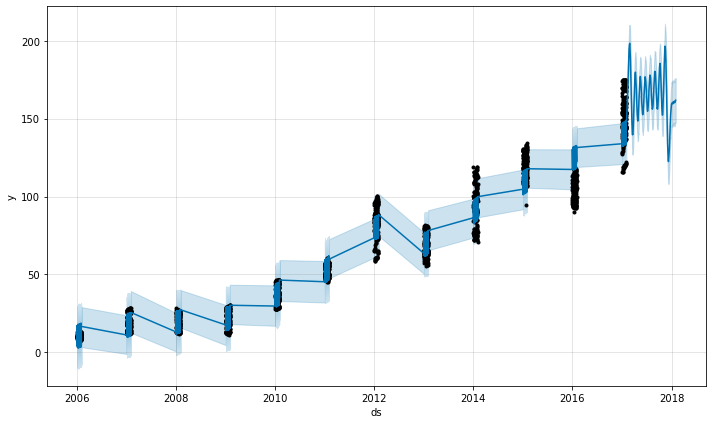

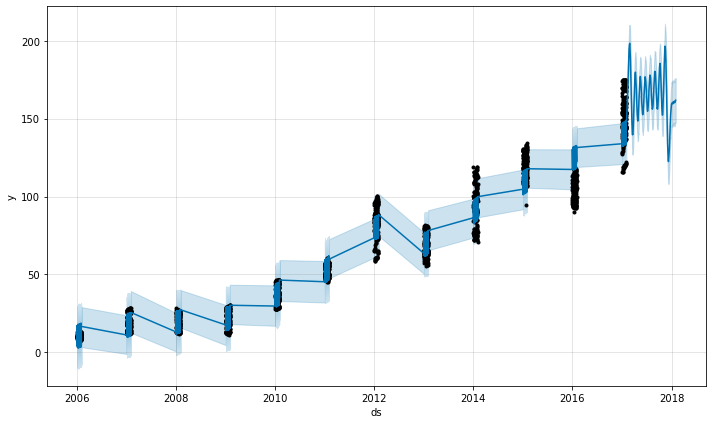

In [13]:
m.plot(forecast)

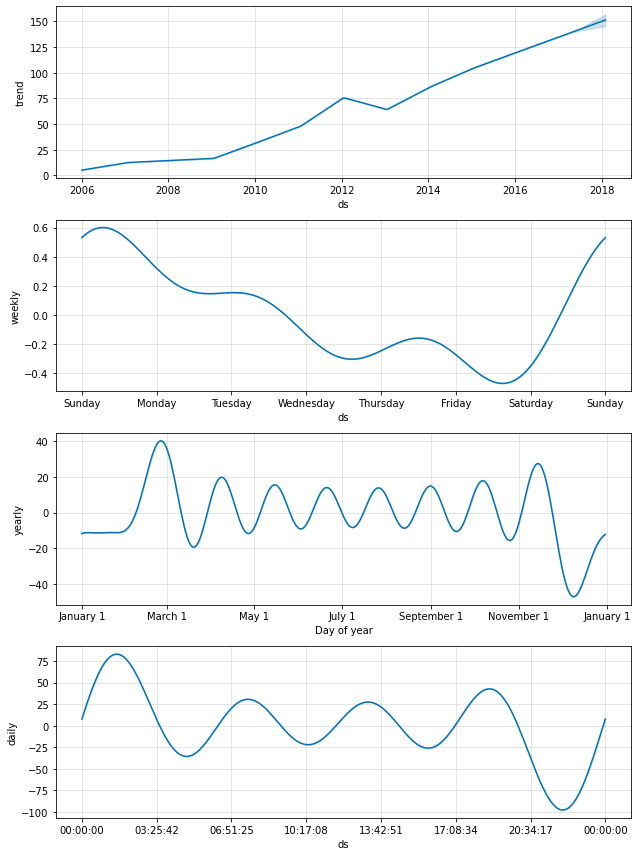

In [14]:
fig2 = m.plot_components(forecast)